In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [2]:
content = pd.read_csv('Content.csv')
reactions = pd.read_csv('Reactions.csv')
reactiontypes = pd.read_csv('ReactionTypes.csv')

In [3]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [5]:
def clean_content(content):
    content.drop(columns=['Unnamed: 0', 'User ID', 'URL'], inplace= True)
    content.dropna(inplace=True)
    content.rename(columns={'Type':'Content Type'}, inplace=True)
    content['Category'] = content['Category'].str.lower()
    content['Category'] = content['Category'].str.replace('"', '')

    return content

content_cleaned = clean_content(content)

In [6]:
content_cleaned.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [7]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [8]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [9]:
def cleaned_reactions(reactions):
    reactions.drop(columns=['Unnamed: 0', 'User ID'], inplace=True)
    reactions.dropna(inplace=True)
    reactions.rename(columns={'Type':'Reaction Type'}, inplace=True)
    reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])
    reactions['Reaction Type'] = reactions['Reaction Type'].str.lower()
    return reactions

reactions_cleaned = cleaned_reactions(reactions)

In [10]:
reactions_cleaned.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [11]:
reactiontypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [12]:
reactiontypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [13]:
def clean_reactiontypes(reactiontypes):
    reactiontypes.drop(columns=['Unnamed: 0'], inplace=True)
    reactiontypes.rename(columns={'Type':'Reaction Type'}, inplace=True)
    reactiontypes['Reaction Type'] = reactiontypes['Reaction Type'].str.lower()
    return reactiontypes

reactiontypes_cleaned = clean_reactiontypes(reactiontypes)

In [14]:
reactiontypes_cleaned.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


# Merge the datasets

- merge content and reactions data based on Content ID
- merge reactions and reactiontypes data based on Reaction Type

In [15]:
merged_one = pd.merge(content_cleaned, reactions_cleaned, on='Content ID')
merged_one.head()

,Content ID,Content Type,Category,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58


In [16]:
merged_full_cleaned_data = pd.merge(merged_one, reactiontypes_cleaned, on='Reaction Type')
merged_full_cleaned_data.head()

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30


In [17]:
#export the merged data to csv file
merged_full_cleaned_data.to_csv('merged_full_cleaned_data.csv', index=False)

# Top 5 Scores per Category

In [18]:
top_scores_per_category = merged_full_cleaned_data.groupby('Category')['Score'].sum().sort_values(ascending=False)
top_scores_per_category.head()

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [19]:
len(top_scores_per_category)

16

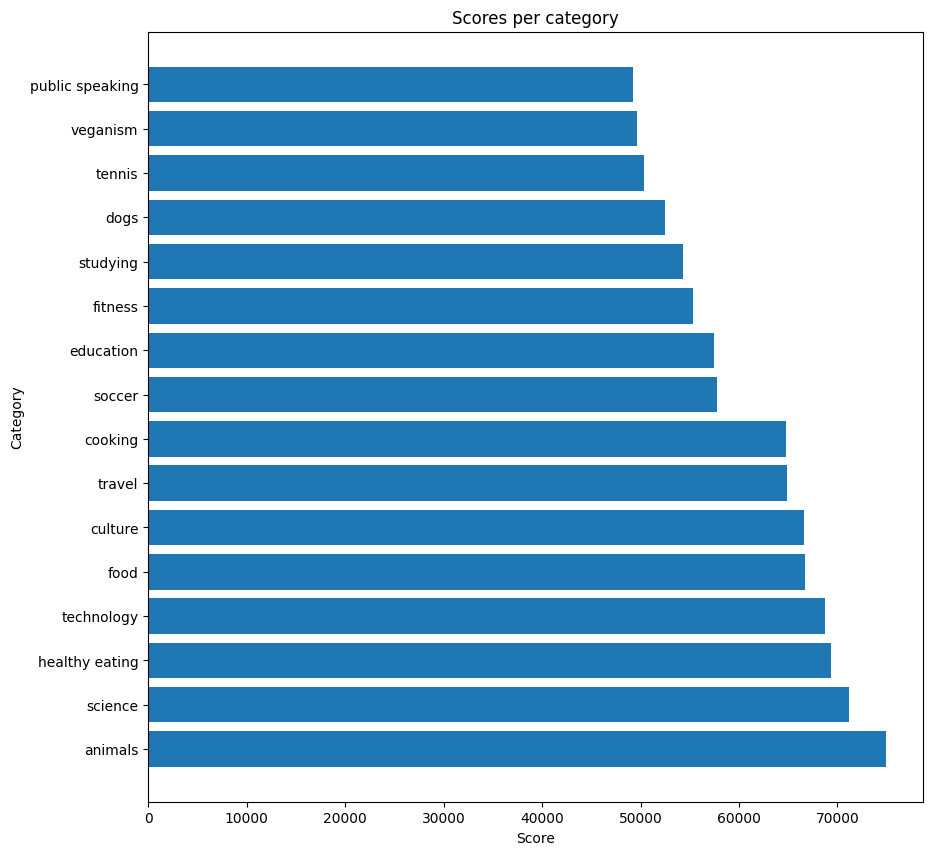

In [20]:
# bar chart
plt.figure(figsize=(10,10))
plt.barh(top_scores_per_category.index, top_scores_per_category.values)
plt.xlabel('Score')
plt.ylabel('Category')
plt.title('Scores per category')
plt.show()


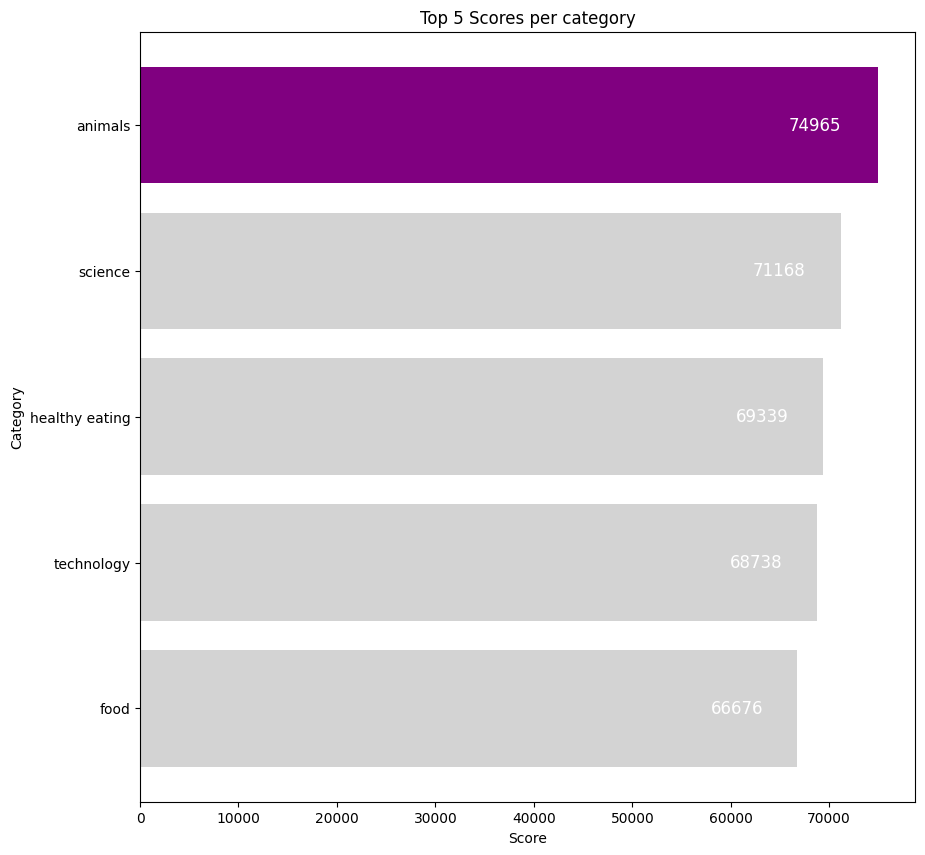

In [21]:
# bar chart for top 5 scores per category
top_5_scores = top_scores_per_category.head()

plt.figure(figsize=(10,10))
# Create a color array
colors = ['lightgray'] * len(top_5_scores)
# Set a different color for the top category
colors[0] = 'purple'
bars = plt.barh(top_5_scores.index, top_5_scores.values, color=colors)
plt.xlabel('Score')
plt.ylabel('Category')
plt.title('Top 5 Scores per category')
plt.gca().invert_yaxis() # descending order


# Add labels to the end of the bars
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  # Position the text slightly before the end of the bar
             bar.get_y() + bar.get_height()/2,  # Position the text vertically centered in the bar
             f'{bar.get_width():.0f}',  # Format the label as an integer
             va='center', ha='right', color='white', fontsize=12) # Align and color the text

plt.show()



# How many reactions are there to most popular category?

In [22]:
reactions_per_category = merged_full_cleaned_data.groupby('Category')['Reaction Type'].count().sort_values(ascending=False)
reactions_per_category.head()

,Reaction Type
Category,
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698


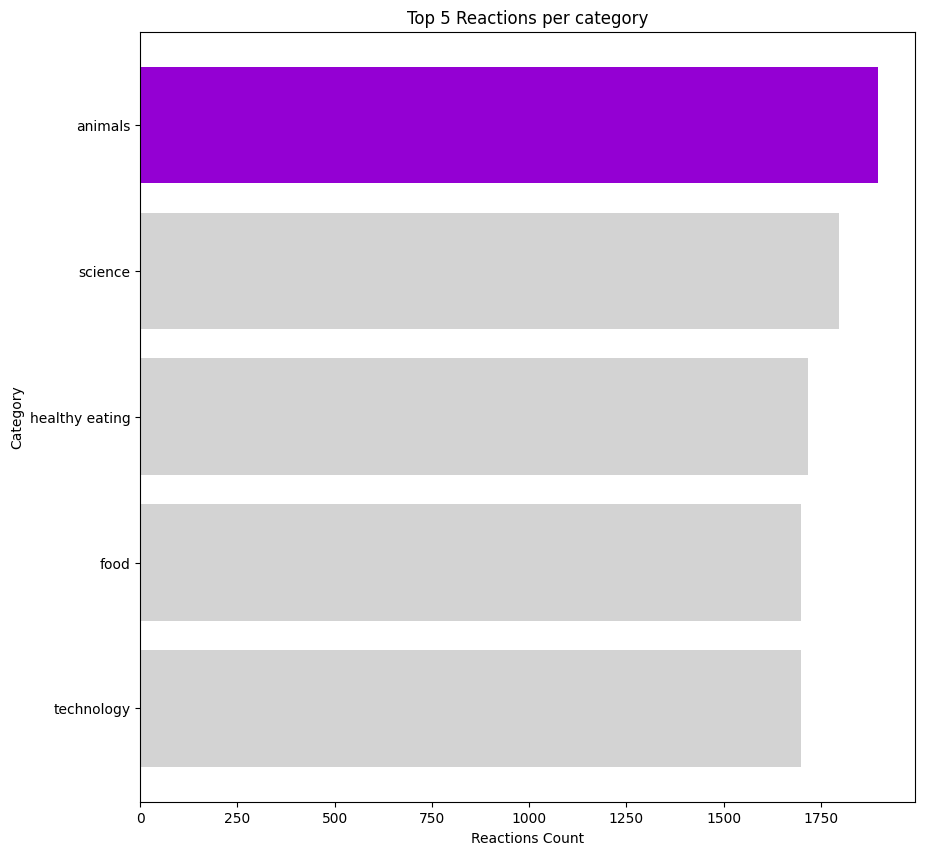

In [23]:
# bar chart for top 5 scores per category
top_5_reaction = reactions_per_category.head()

plt.figure(figsize=(10,10))
# Create a color array
colors = ['lightgray'] * len(top_5_reaction)
# Set a different color for the top category
colors[0] = 'darkviolet'
plt.barh(top_5_reaction.index, top_5_reaction.values, color=colors)
plt.xlabel('Reactions Count')
plt.ylabel('Category')
plt.title('Top 5 Reactions per category')
plt.gca().invert_yaxis() # descending order
plt.show()

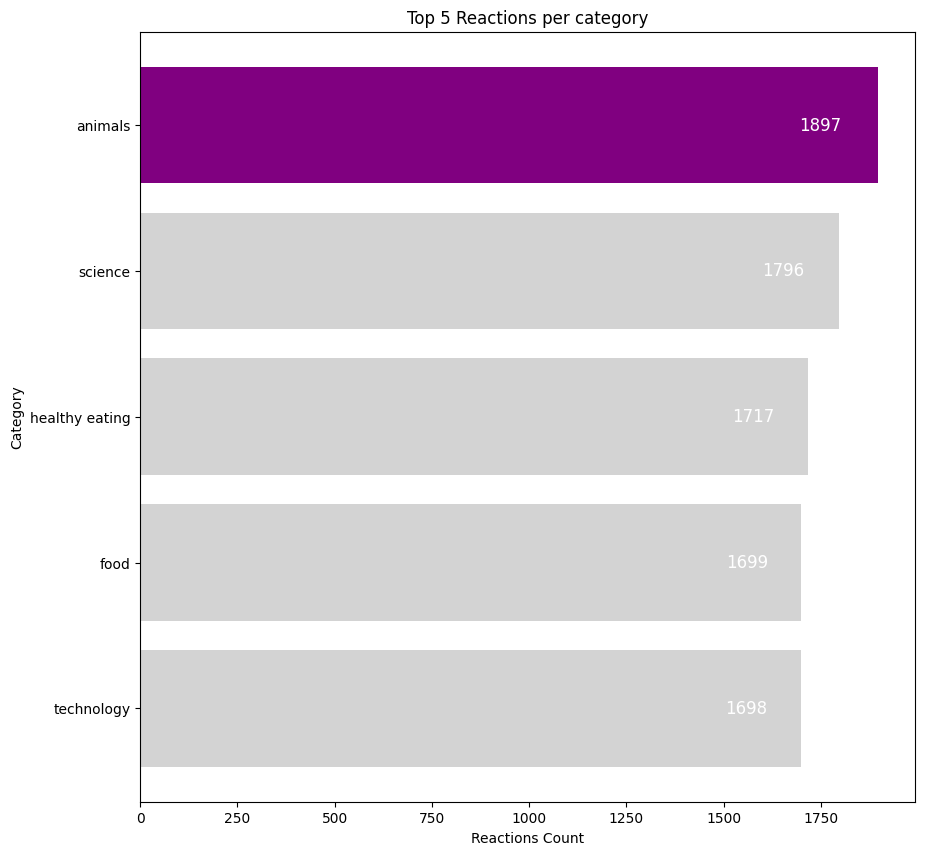

In [24]:
# bar chart for top 5 scores per category
top_5_reaction = reactions_per_category.head()

plt.figure(figsize=(10,10))
# Create a color array
colors = ['lightgray'] * len(top_5_reaction)
# Set a different color for the top category
colors[0] = 'purple'
bars = plt.barh(top_5_reaction.index, top_5_reaction.values, color=colors)
plt.xlabel('Reactions Count')
plt.ylabel('Category')
plt.title('Top 5 Reactions per category')
plt.gca().invert_yaxis() # descending order

# Add labels to the end of the bars
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  # Position the text slightly before the end of the bar
             bar.get_y() + bar.get_height()/2,  # Position the text vertically centered in the bar
             f'{bar.get_width():.0f}',  # Format the label as an integer
             va='center', ha='right', color='white', fontsize=12) # Align and color the text

plt.show()

# What was the month with the most posts?

- time series plot using month and year

In [25]:
merged_full_cleaned_data['Datetime'] = pd.to_datetime(merged_full_cleaned_data['Datetime'])
merged_full_cleaned_data['Datetime'] = merged_full_cleaned_data['Datetime'].dt.strftime('%b, %Y')
merged_full_cleaned_data.head()

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,"Nov, 2020",negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,"Jun, 2021",negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,"Apr, 2021",negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,"Jan, 2021",negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,"Aug, 2020",positive,30


In [26]:
total_post_per_datetime = merged_full_cleaned_data.groupby('Datetime')['Content ID'].count()
total_post_per_datetime

,Content ID
Datetime,
"Apr, 2021",1974
"Aug, 2020",2114
"Dec, 2020",2092
"Feb, 2021",1914
"Jan, 2021",2126
"Jul, 2020",2070
"Jun, 2020",892
"Jun, 2021",1129
"Mar, 2021",2012


Text(0.5, 1.0, 'Total Posts per Month')

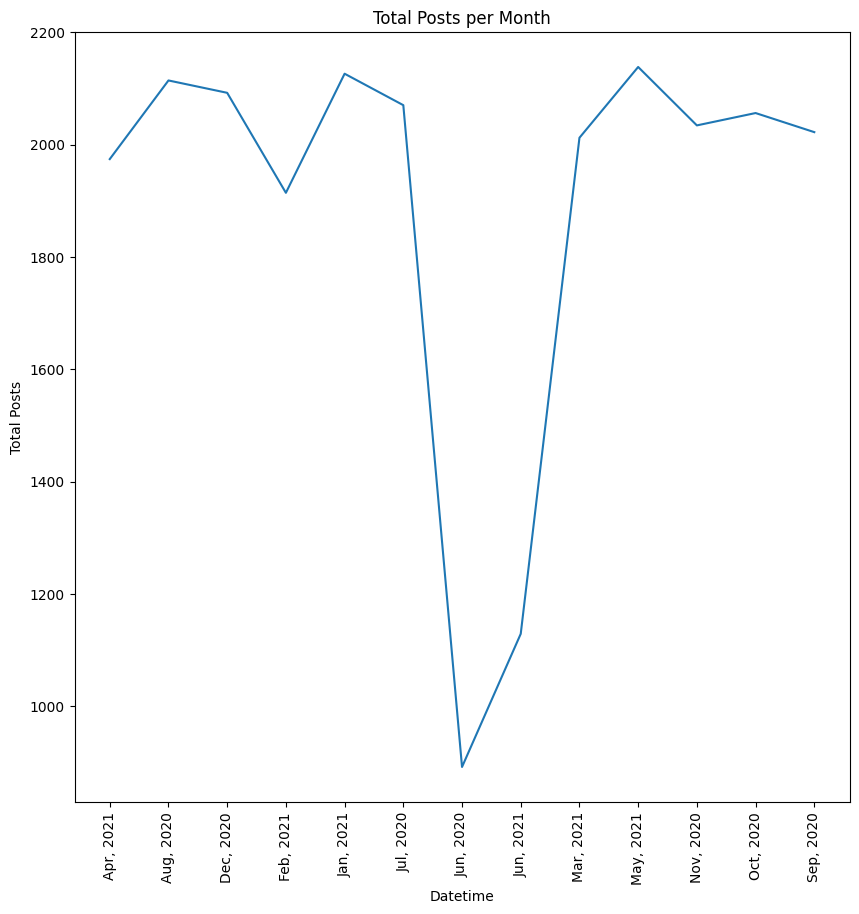

In [27]:
plt.figure(figsize=(10,10))
plt.plot(total_post_per_datetime.index, total_post_per_datetime.values)
plt.xlabel('Datetime')
plt.ylabel('Total Posts')
plt.xticks(rotation=90)
plt.title('Total Posts per Month')

<ipython-input-28-7e6fc0ab0d0d>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_post_per_datetime.index, rotation=90)


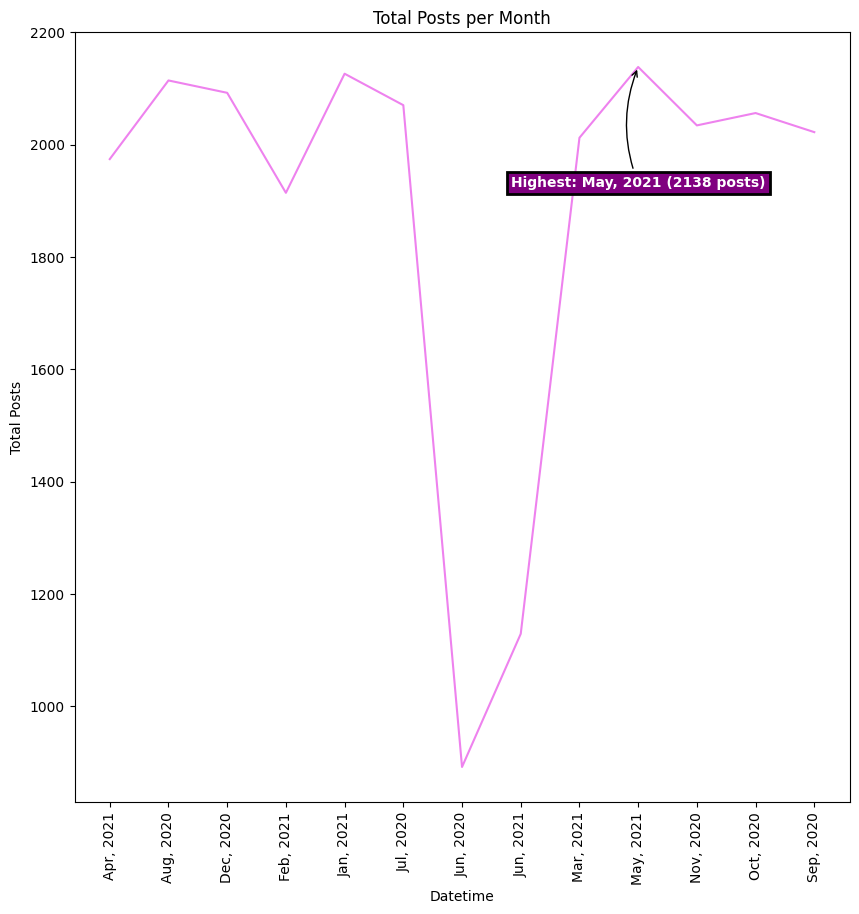

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(total_post_per_datetime.index, total_post_per_datetime.values, color = 'violet')
ax.set_xlabel('Datetime')
ax.set_ylabel('Total Posts')
ax.set_xticklabels(total_post_per_datetime.index, rotation=90)
ax.set_title('Total Posts per Month')
# Find the month with the most posts
max_posts_month = total_post_per_datetime.idxmax()
max_posts_count = total_post_per_datetime.max()
# Annotate the highest point with bolder text, purple background and box shape
ax.annotate(f'Highest: {max_posts_month} ({max_posts_count} posts)',
            xy=(max_posts_month, max_posts_count),
            xytext=(max_posts_month, max_posts_count * 0.9),
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle="arc3,rad=-0.2"),
            ha='center',
            fontsize=10,
            fontweight='bold', # Make text bolder
            color='white', # Set text color to white
            bbox=dict(boxstyle="square,pad=0.3", fc="purple", ec="black", lw=2)) # Add purple background and box shape
plt.show()

# Pivot Table of Category vs DateTime

In [29]:
datetime_vs_category = pd.pivot_table(merged_full_cleaned_data, values='Content ID', index='Category', columns='Datetime', aggfunc='count', fill_value=0)
datetime_vs_category

Datetime,"Apr, 2021","Aug, 2020","Dec, 2020","Feb, 2021","Jan, 2021","Jul, 2020","Jun, 2020","Jun, 2021","Mar, 2021","May, 2021","Nov, 2020","Oct, 2020","Sep, 2020"
Category,,,,,,,,,,,,,
animals,157,160,161,134,182,124,79,94,143,175,174,153,161
cooking,116,138,150,119,141,144,71,85,142,163,127,142,126
culture,135,139,138,116,152,149,63,82,150,154,135,137,126
dogs,103,107,123,105,114,95,46,72,106,114,126,103,124
education,124,126,126,111,136,113,58,71,127,113,108,115,105
fitness,117,129,114,112,128,128,46,62,105,113,109,120,112
food,138,146,145,142,142,135,52,72,139,160,147,150,131
healthy eating,144,142,150,129,137,152,69,77,123,163,138,150,143
public speaking,74,103,90,99,118,92,43,56,104,106,115,102,115


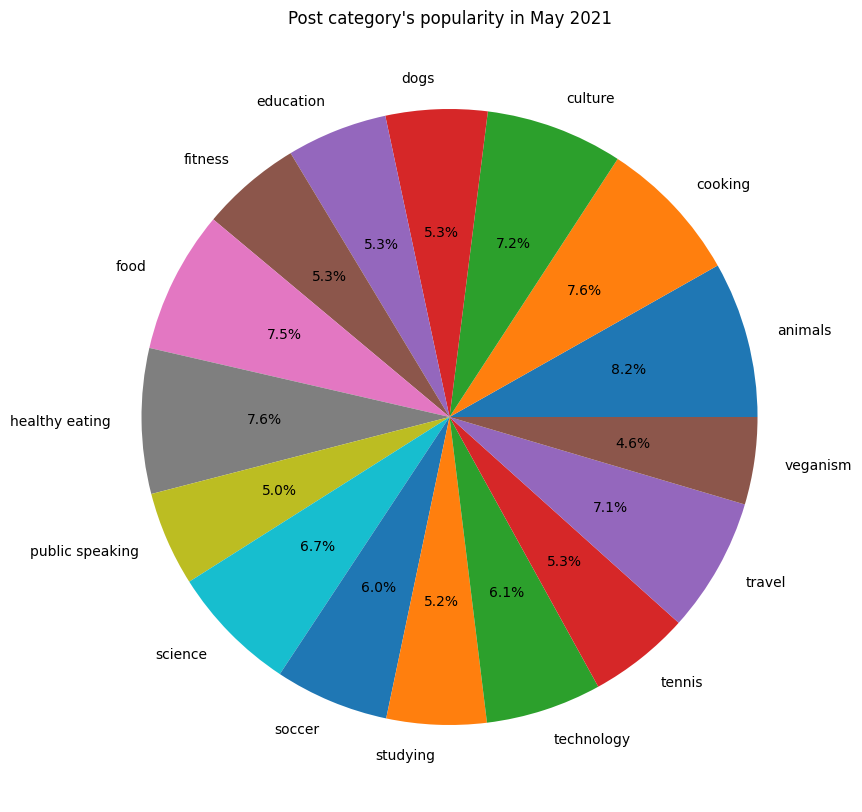

In [30]:
# pie chart of the May 2021 vs category using datetime_vs_category
may_2021 = datetime_vs_category.loc[:, 'May, 2021']
may_2021

plt.figure(figsize=(10,10))
plt.pie(may_2021, labels=may_2021.index, autopct='%1.1f%%')
plt.title('Post category\'s popularity in May 2021')
plt.show()

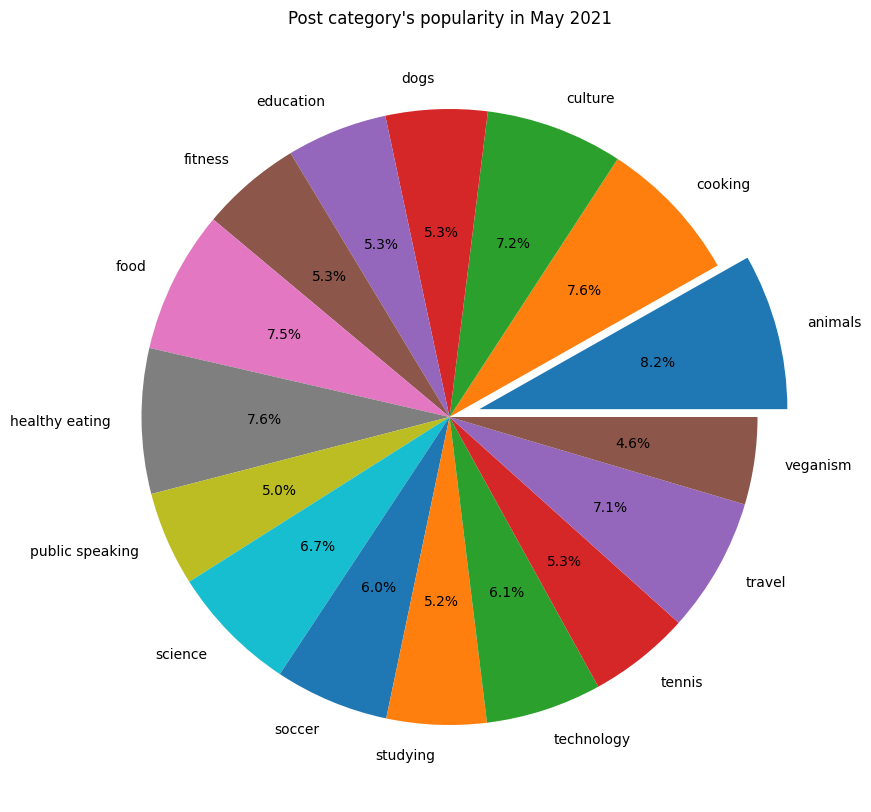

In [31]:
# Moving the animals's pie slightly away from the chart
may_2021 = datetime_vs_category.loc[:, 'May, 2021']
may_2021

# Explode the "animals" slice
explode = [0] * len(may_2021)
# Find the index of 'animals'
try:
  animals_index = may_2021.index.get_loc('animals')
  explode[animals_index] = 0.1 # Adjust this value to control how much the slice is moved
except KeyError:
  # Handle the case where 'animals' is not in the data
  print("Category 'animals' not found in May, 2021 data.")
  explode = [0] * len(may_2021) # Reset explode if 'animals' is not found

plt.figure(figsize=(10,10))
plt.pie(may_2021, labels=may_2021.index, autopct='%1.1f%%', explode=explode)
plt.title('Post category\'s popularity in May 2021')
plt.show()